## Celtics

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/8/8f/Boston_Celtics.svg/1200px-Boston_Celtics.svg.png" heigh=150, width=150>

### Data

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tabulate import tabulate
plt.style.use('seaborn-bright')

In [4]:
# url for each year

url_2020 = 'https://www.basketball-reference.com/teams/BOS/2020_games.html'
url_2019 = 'https://www.basketball-reference.com/teams/BOS/2019_games.html'
url_2018 = 'https://www.basketball-reference.com/teams/BOS/2018_games.html'
url_2017 = 'https://www.basketball-reference.com/teams/BOS/2017_games.html'
url_2016 = 'https://www.basketball-reference.com/teams/BOS/2016_games.html'
url_2015 = 'https://www.basketball-reference.com/teams/BOS/2015_games.html'

# DataFrame for each year

df_2020 = pd.read_html(url_2020)[0]
df_2019 = pd.read_html(url_2019)[0]
df_2018 = pd.read_html(url_2018)[0]
df_2017 = pd.read_html(url_2017)[0]
df_2016 = pd.read_html(url_2016)[0]
df_2015 = pd.read_html(url_2015)[0]

# create list of all DataFrames

years = [df_2020, df_2019, df_2018, df_2017, df_2016, df_2015]

# Concat all df together
c_data = pd.concat(years)

# rename column
c_data.rename(columns={'Unnamed: 7': 'Result'}, inplace=True)

# remove extra header
c_data = c_data[c_data.G != 'G']

# change date to datetime object
c_data['Date'] = pd.to_datetime(c_data['Date'])

<h2>Total Games</h2>

In [5]:
tgp = c_data['Result'].count()
print(" ", tgp)

  482


<h2>Win vs Loss</h2>

W    293
L    189
Name: Result, dtype: int64


<AxesSubplot:>

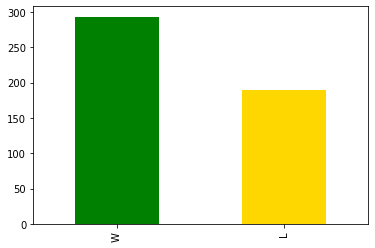

In [19]:
wvl = c_data['Result'].value_counts()
print(wvl)

wvl.plot(kind='bar', color=['green', 'gold'])

### VS Team

In [33]:
def opp_team(team):
    
    opponent = c_data[c_data['Opponent'].str.contains(team)]
    opponent = opponent.iloc[:,[1,6,7,9,10]]
    opponent = opponent.sort_values(by='Date')
    
    print(f'Celtivs vs {team}')
    print()
    print(opponent)
    print()
    print('Win vs Loss')
    print()
    print(opponent['Result'].value_counts())
    print()
    opponent['Result'].value_counts().plot(kind='bar', color=['green', 'gold'])

### Instert team name to view results

Celtivs vs Toronto

         Date         Opponent Result   Tm  Opp
3  2014-11-05  Toronto Raptors      L  107  110
35 2015-01-10  Toronto Raptors      L   96  109
79 2015-04-04  Toronto Raptors      W  117  116
84 2015-04-14  Toronto Raptors      W   95   93
1  2015-10-30  Toronto Raptors      L  103  113
44 2016-01-20  Toronto Raptors      L  109  115
71 2016-03-18  Toronto Raptors      L   91  105
74 2016-03-23  Toronto Raptors      W   91   79
23 2016-12-09  Toronto Raptors      L   94  101
38 2017-01-10  Toronto Raptors      L  106  114
50 2017-02-01  Toronto Raptors      W  109  104
59 2017-02-24  Toronto Raptors      L   97  107
13 2017-11-12  Toronto Raptors      W   95   94
56 2018-02-06  Toronto Raptors      L   91  111
78 2018-03-31  Toronto Raptors      W  110   99
80 2018-04-04  Toronto Raptors      L   78   96
1  2018-10-19  Toronto Raptors      L  101  113
14 2018-11-16  Toronto Raptors      W  123  116
45 2019-01-16  Toronto Raptors      W  117  108
63 2019-02-26  Toron

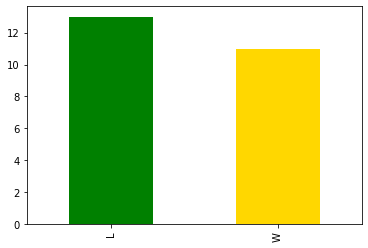

In [34]:
opp_team('Toronto')